# 0. Introduction

## Goal

This notebook aims to present how data stored in non formatted documents could be leveraged to improve data quality inside the PIM.

This notebook uses a handful of modules developped inside this project.

## What pipeline?

The different steps for this project are as follows:

1. fetch all product IDs from PIM with the associated ingredient lists
- split the products between a train set and a test set
- train the algorithm on the train set: i.e. construct the vocabulary
- make it make prediction on the test set
- compare it with the ingredient list on this product

# 1. Fetching the data

We will use production data for training and testing of this model. The ID of the products are the PIM uid, and therefore are listed in the directory of the PIM-API module.

First, let's get those uids.

In [1]:
from src import pimapi
requester = pimapi.Requester('prd')
requester.refresh_directory()
requester._directory

Done


,type,title,lastModified,lastRefreshed,lastFetchedData,lastFetchedFiles
uid,,,,,,
58f67e91-6d16-4f12-97c7-e67d24be6805,pomProduct,Curcuma moulu en sac 1 kg LA CASE AUX EPICES,2019-12-06 11:24:21.231000+00:00,2020-02-06 09:08:52.951236+00:00,2020-02-03 13:22:18.211934+00:00,2020-02-03 13:22:48.460434+00:00
f46327cf-8f3c-4b67-85fa-7e6e6daaf618,pomProduct,Pique à viande bleu en sachet de 100 HIPPOPOTAMUS,2020-01-06 14:52:29.288000+00:00,2020-02-06 09:08:52.951236+00:00,2020-02-03 13:22:18.211934+00:00,2020-02-03 13:22:48.460434+00:00
58a1ae66-ca4d-4d82-9d30-4073b1edaeb8,pomProduct,Pique à viande rouge en sachet de 100 HIPPOPOT...,2020-01-06 14:52:48.715000+00:00,2020-02-06 09:08:52.951236+00:00,2020-02-03 13:22:18.211934+00:00,2020-02-03 13:22:48.460434+00:00
9bc59474-7839-458b-b56a-ba334fe4894b,pomProduct,Pique à viande noir en sachet de 100 HIPPOPOTAMUS,2020-01-06 14:53:00.627000+00:00,2020-02-06 09:08:52.951236+00:00,2020-02-03 13:22:18.211934+00:00,2020-02-03 13:22:48.460434+00:00
c97834e7-124e-4491-9f2a-3e4009fdda4e,pomProduct,Pique à viande marron en sachet de 100 HIPPOPO...,2020-01-06 14:53:12.375000+00:00,2020-02-06 09:08:52.951236+00:00,2020-02-03 13:22:18.211934+00:00,2020-02-03 13:22:48.460434+00:00
...,...,...,...,...,...,...
4faf7ca2-a2f9-46fe-8a4a-bfe2b34d3f03,pomProduct,BARQUETTE BATEAU CARTON KRAFT 750ML,2020-02-05 10:51:18.368000+00:00,2020-02-06 09:08:52.951236+00:00,2020-02-05 15:02:51.124161+00:00,2020-02-05 15:02:57.745582+00:00
d6cac131-5125-4a1c-9933-62305f9c8db7,pomProduct,BARQUETTE BATEAU CARTON KRAFT 1100ML,2020-02-05 10:57:02.392000+00:00,2020-02-06 09:08:52.951236+00:00,2020-02-05 15:02:51.124161+00:00,2020-02-05 15:02:57.745582+00:00
2872fcba-76dd-4e2c-b22c-8e15c6441607,pomProduct,MIX CŒUR BLE LENT COR VERT 2KGX3,2020-02-05 13:45:22.597000+00:00,2020-02-06 09:08:52.951236+00:00,2020-02-05 15:02:51.124161+00:00,2020-02-05 15:02:57.745582+00:00


One can see the modification status of the product via the `modification_report` method:

In [2]:
requester.modification_report()

Number of items: 12881
Number of items with outdated data: 2
Number of items with outdated files: 88


Outdated products can be refreshed via the following:

In [3]:
requester.fetch_list_from_PIM(requester.modified_items())
requester.dump_data_from_result()
requester.dump_files_from_result()
requester.modification_report()

Done
Done
Launching 2 threads.
Thread complete!
Thread complete!
Done
Number of items: 12881
Number of items with outdated data: 0
Number of items with outdated files: 0


The PIM uids of the products are the keys of the `directory` of our requester. We extract the ingredients associated with these uids.

In [4]:
requester.fetch_all_from_PIM(page_size=1000, max_page=-1, nx_properties='*')
requester.result[0].json()['entries'][0]

Done


{'entity-type': 'document',
 'repository': 'default',
 'uid': 'df8bb420-ff59-4af3-9a98-4c3ff91c833c',
 'path': '/default-domain/pomSupplierWorkspace/HARIBO/Chamallow_en_sachet_100_g_HARIBO',
 'type': 'pomProduct',
 'state': 'product.waiting.supplier.validation',
 'parentRef': '4f201ee0-9e34-4ec3-b44b-9f141b05ec61',
 'isCheckedOut': False,
 'isVersion': False,
 'isProxy': False,
 'changeToken': '33-0',
 'isTrashed': False,
 'title': 'Chamallow en sachet 100 g HARIBO',
 'lastModified': '2020-01-09T11:29:43.600Z',
 'properties': {'pprodc:ingredientsList': 'Sirop de glucose, sucre, eau, gélatine, stabilisant : sirop de sorbitol, maltodextrine, amidon, acidifiant : acide citrique, arôme, colorant : carmins.',
  'pprodc:withoutPalmOil': 'non',
  'pprodc:withoutEDTA': None,
  'pprodc:withoutAdditive': 'non',
  'pprodc:eggFarmingMode': None,
  'pprodc:monoIngredient': False,
  'pprodc:withoutChlorine': None,
  'pprodc:activeIngredients': [],
  'pprodc:mainIngredients': [],
  'pprodc:withoutCor

In [5]:
mapping = {'uid': 'uid', 'Libellé': 'title', 'Ingrédients': 'properties.pprodc:ingredientsList'}
df = requester.result_to_dataframe(record_path='entries', mapping=mapping, index='uid')
df

,Libellé,Ingrédients
uid,,
df8bb420-ff59-4af3-9a98-4c3ff91c833c,Chamallow en sachet 100 g HARIBO,"Sirop de glucose, sucre, eau, gélatine, stabil..."
2f2af35c-5f1d-4fc2-9af4-deb9e261a29f,Bouillon de légumes sans sel ajouté en sachet ...,Sirop de glucose de maïs - Extraits naturels d...
32ac61fe-a3c2-4505-9ceb-8c736416757b,Bouillon de légume sans sel ajouté en sachet 5...,Sirop de glucose de maïs - Extraits naturels d...
a6505df4-3d18-4265-9cdc-173461b9e5ac,Double concentré de tomate 28% en boîte 5/1 VA...,Purée de tomates double concentrée 28% (tomate...
e4ebaa4b-0ddb-45b0-ac1e-c85b369bb840,Double concentré de tomate 28% en boîte 5/1 VA...,Tomates
...,...,...
ee2a60ff-581f-4c7b-968b-5e7983b3c5ff,HARICOTS VERTS EXTRA FINS 4/4 EPISAVEURS,"haricots verts , eau, sel"
272c9c44-39a3-4391-bc3b-d40aad9e1c25,FLAGEOLETS EXTRA FINS 5/1,"flageolets verts, eau, sel"
e493062f-5aa6-48be-9fc8-d7b37235c466,BOITE BURGER KRAFT 145X130X80,None


# 2. Train / Test split

We will separate our data into a train test and a test set of equal sizes.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.5, random_state=42)

In [7]:
print(len(X_train))
X_train.iloc[:10]

6440


,Libellé,Ingrédients
uid,,
37d331a4-74fe-4ccb-a100-433eaf000638,CÔTES DU RHÔNE ROUGE AOP EN BOUTEILLE 75 CL LO...,VIN ROUGE
70e80345-a45d-40d8-97e0-a64bd0f3d425,"Ketchup en dose 11,3 g HEINZ","Tomates (148 g pour 100 g de ketchup), vinaigr..."
92ecbb44-438d-4098-8202-f3767403c244,Doseur manuel Mastermain ERDEMIL,None
262dc365-b8e9-4e90-be77-bc5fdc562f92,Chapelure brune en sachet 1 kg VIVIEN PAILLE,"Farine de BLE, huile de colza, eau, sucre, lev..."
fa380ee9-008e-4b6b-9bcc-c2fb5f1613a7,ORIGAN,None
e7803ae4-e774-45f5-88ab-8eee1620b5fd,Agar-agar en pot 650 g SAINTE LUCIE,100% agar agar
def56157-1ab2-4c12-840f-8c488f403750,50 SERV CELISOFT BLANC LUNCH POCH 40X40 IMP 2C...,None
0cffb1a7-f9a0-43ee-8965-a4a21bf69036,Jus de citron jaune reconstitué en flacon 200 ...,"Jus de citron reconstitué (99,972%), E224 Mét..."
2c134cbc-038a-46eb-bb15-0489bd9a8337,Thé Vert Gun Powder en boîte 25 pyramides en s...,Thé vert gunpowder


In [8]:
print(len(X_test))
X_test.iloc[:10]

6441


,Libellé,Ingrédients
uid,,
ed481c35-3bab-4621-86a2-596925368691,"Bière blonde 6,4% en bouteille verre 75 cl CH'TI",Eau - Malts d'ORGE - sucre - Malt de BLE - Hou...
43de15cd-930a-463a-849b-8e37c2b3bbfd,Assiette carrée blanche bagasse ø 26 cm en sac...,None
c3abfffa-d4c6-4f1b-a8e0-bc454426e562,Double concentré de tomate 28% en boîte 4/4 VA...,"Tomates, sel, acidifiant : acide citrique"
44af5622-c426-4bf4-8fdc-6286370d7687,Boîte pâtissière en carton 16 x 16 x 5 cm PUBL...,None
19962287-c922-4101-b780-05c1ade60515,Guimauve ourson enrobée de chocolat au lait en...,"Sirop de glucose-fructose, sucre, eau, beurre ..."
9f72ae2b-37da-42f2-a2a8-6f6b641cd2d7,Tabasco Chipotle en flacon 60 ml TABASCO,Piment Chipotle32% (piment rouge Jalapeñofumé)...
f7e01a0e-de3c-4f95-a5f3-894efbab6aca,"Mouss'line en sac 2,5 kg COMPLET","Sucre, amidon modifié, matière grasse de palme..."
356185bd-cb62-4bdc-ad71-87b3a8726101,Barquette charcutière 40 cc en sachet de 500 A...,None
267ef9b0-fdde-4c2d-8004-fc6fd82ba966,Mayonnaise en dose 10 ml HEINZ,"Huile végétale (70%), eau, vinaigre d'alcool, ..."


# 3. Constructing the vocabulary

We will now use bag-of-words related functionalities of scikit-learn to construct our vocabulary.

## 3.1 Removing `None` values

First step is to remove `None` values from ingredient lists to make our count of words.

In [9]:
import pandas as pd
print(f'None values before replacement in X_train: {sum(pd.isna(X_train["Ingrédients"]))}')
X_train.loc[:, 'Ingrédients'].fillna('', inplace=True)
print(f'None values after replacement in X_train: {sum(pd.isna(X_train["Ingrédients"]))}')
print(f'None values before replacement in X_test: {sum(pd.isna(X_test["Ingrédients"]))}')
X_test.loc[:, 'Ingrédients'].fillna('', inplace=True)
print(f'None values after replacement in X_train: {sum(pd.isna(X_test["Ingrédients"]))}')

None values before replacement in X_train: 1690
None values after replacement in X_train: 0
None values before replacement in X_test: 1695
None values after replacement in X_train: 0


C:\Users\pmasse\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## 3.2 Parsing the corpus

We now parse our ingredient lists, with a naive approach (no stop words, no preprocessing, ...).

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train.loc[:, 'Ingrédients'])

We can see that we know have a matrix with as much rows as the number of products in our train corpus, and as much columns as the number of different words in their ingredient lists.

In [11]:
X_train_counts.shape

(6440, 3143)

The vocabulary has been computed: 

In [12]:
print(f'The vocabulary length is {len(count_vect.vocabulary_)}')
count_vect.vocabulary_

The vocabulary length is 3143


{'vin': 3015,
 'rouge': 2606,
 'tomates': 2883,
 '148': 51,
 'pour': 2430,
 '100': 29,
 'de': 1022,
 'ketchup': 1824,
 'vinaigre': 3016,
 'sucre': 2783,
 'sel': 2700,
 'extraits': 1414,
 'épices': 3114,
 'et': 1387,
 'herbes': 1706,
 'contiennent': 894,
 'du': 1114,
 'celeri': 731,
 'épice': 3113,
 'farine': 1422,
 'ble': 564,
 'huile': 1719,
 'colza': 841,
 'eau': 1317,
 'levure': 1890,
 'levain': 1884,
 'gluten': 1604,
 'céréales': 1013,
 'moulues': 2080,
 'seigle': 2699,
 'avoine': 480,
 'epeautre': 1362,
 'orge': 2217,
 'riz': 2590,
 'sarrasin': 2671,
 'fève': 1541,
 'dextrose': 1059,
 'graines': 1639,
 'tournesol': 2902,
 'lin': 1898,
 'millet': 2024,
 'pavot': 2293,
 'amarante': 360,
 'quinoa': 2534,
 'beurre': 532,
 'agar': 311,
 'jus': 1811,
 'citron': 811,
 'reconstitué': 2561,
 '99': 251,
 '972': 249,
 'e224': 1204,
 'métabisulfite': 2112,
 'potassium': 2418,
 '028': 18,
 'exprimé': 1407,
 'en': 1338,
 'so2': 2725,
 'thé': 2866,
 'vert': 3002,
 'gunpowder': 1681,
 'purée': 25

We can print out the top 10 most frequent words in our ingredient lists:

In [13]:
word_counts = X_train_counts.sum(axis=0)
word_counts2 = [(word, word_counts[0, idx]) for word, idx in count_vect.vocabulary_.items()]
word_counts2.sort(key=lambda x: x[1], reverse=True)
word_counts = word_counts2
word_counts[:10]

[('de', 14212),
 ('sucre', 2870),
 ('sel', 2259),
 ('acide', 1888),
 ('eau', 1782),
 ('lait', 1460),
 ('huile', 1431),
 ('poudre', 1401),
 ('arôme', 1293),
 ('et', 1175)]

# 4. First analysis of a single document

## 4.1 Parsing a doc from the test set

First, we use a function that parses a document from the disk from its product uid and returns a list of strings. For illustration, we choose one of the products in our test set.

In [14]:
X_test.iloc[:10]

,Libellé,Ingrédients
uid,,
ed481c35-3bab-4621-86a2-596925368691,"Bière blonde 6,4% en bouteille verre 75 cl CH'TI",Eau - Malts d'ORGE - sucre - Malt de BLE - Hou...
43de15cd-930a-463a-849b-8e37c2b3bbfd,Assiette carrée blanche bagasse ø 26 cm en sac...,
c3abfffa-d4c6-4f1b-a8e0-bc454426e562,Double concentré de tomate 28% en boîte 4/4 VA...,"Tomates, sel, acidifiant : acide citrique"
44af5622-c426-4bf4-8fdc-6286370d7687,Boîte pâtissière en carton 16 x 16 x 5 cm PUBL...,
19962287-c922-4101-b780-05c1ade60515,Guimauve ourson enrobée de chocolat au lait en...,"Sirop de glucose-fructose, sucre, eau, beurre ..."
9f72ae2b-37da-42f2-a2a8-6f6b641cd2d7,Tabasco Chipotle en flacon 60 ml TABASCO,Piment Chipotle32% (piment rouge Jalapeñofumé)...
f7e01a0e-de3c-4f95-a5f3-894efbab6aca,"Mouss'line en sac 2,5 kg COMPLET","Sucre, amidon modifié, matière grasse de palme..."
356185bd-cb62-4bdc-ad71-87b3a8726101,Barquette charcutière 40 cc en sachet de 500 A...,
267ef9b0-fdde-4c2d-8004-fc6fd82ba966,Mayonnaise en dose 10 ml HEINZ,"Huile végétale (70%), eau, vinaigre d'alcool, ..."


In [15]:
from src.pimpdf import PDFDecoder
import os

# This uid has been gotten from the previous cell, maybe from a previous run!
uid = '776613db-a461-44e1-ab6a-1344ac6ae99c'
test_doc_blocks = PDFDecoder.path_to_blocks(os.path.join('.', 'dumps', 'prd', uid, 'FTF.pdf'))
print(f'Number of blocks in this document: {len(test_doc_blocks)}')
test_doc_blocks

Number of blocks in this document: 42


['FICHE DE SPECIFICATIONS',
 "DELIR' PIK (avec violet)",
 'ANNEXE 02207B\ndate:10/06/2015',
 'HACCP',
 "Définition et procédé d'obtention :",
 "Assortiment d'articles de confiserie, gélifiés, souples, colorés, pour certains composés de deux couches (une \ntranslucide colorée et une opaque blanche), enrobés de sucre acidifié, obtenus par la technique de coulée d'un sirop \nrésultant de la dissolution de sucres et gélatine (foisonné pour la couche opaque) dans des empreintes d'amidon natif \nde maïs leur conférant des formes originales qui après gélification et séchage, sont démoulés, dépoudrés et enrobés \nde sucre acidifié.",
 'Dénomination :',
 'confiserie gélifiée acidifiée',
 'Composition :',
 "Ingrédients:  sirop de glucose; sucre; gélatine; dextrose; acidifiants: acide citrique, acide malique; agent d'enrobage: \ncire de carnauba; correcteurs d'acidité: citrate tricalcique, malate acide de sodium; arôme; concentrés de fruits et de \nplantes: citron, carthame, spiruline, patate dou

For this specific document (*776613db-a461-44e1-ab6a-1344ac6ae99c*), the correct block of text is:

    Ingrédients:  sirop de glucose; sucre; gélatine; dextrose; acidifiants: acide citrique, acide malique; agent d'enrobage: cire de carnauba; correcteurs d'acidité: citrate tricalcique, malate acide de sodium; arôme; concentrés de fruits et de plantes: citron, carthame, spiruline, patate douce, radis; sirop de sucre inverti; colorants: carmins, bleu patenté V, carotènes végétaux, lutéine, anthocyanes.

The index of this correct block is *9* in our block list.

In [16]:
true_idx = 9

We will now parse these blocks with the vocabulary computed from our train set. We reuse the `CountVectorizer` we trained before, but take care just to use the `transform` method.

Using the `fit_transform` method would retrain the model with the current blocks of text.

In [17]:
test_doc_counts = count_vect.transform(test_doc_blocks)
test_doc_counts

<42x3143 sparse matrix of type '<class 'numpy.int64'>'
	with 154 stored elements in Compressed Sparse Row format>

## 4.2 Getting some insights from this first analysis

We can compute and draw the terms counts for our blocks: 

In [18]:
import numpy as np

term_counts = np.ravel(test_doc_counts.sum(axis=1))
term_counts

array([ 1,  2,  3,  0,  1, 40,  0,  1,  0, 50,  0,  0, 10,  1,  2,  3,  0,
        2,  2,  0,  0,  5,  2,  2,  1,  2,  0,  2,  3,  0,  1,  4, 12,  4,
        0,  3,  5,  1, 15,  2, 11,  0], dtype=int64)

We can see that the *true* ingredient list has the higher term_count. However, term counts alone are likely to have a biais toward long blocks, so we can also compute a term frequency.

We will instantiate a new count_vectorizer, for the sole purpose of counting tokens in the blocks.

In [19]:
blocks_word_counts = np.ravel(CountVectorizer().fit_transform(test_doc_blocks).todense().sum(axis=1))
blocks_word_counts

array([ 3,  4,  6,  1,  4, 70,  1,  3,  1, 50,  3,  1, 14,  5,  2,  4,  1,
        2,  2,  2,  4,  5,  2,  2,  2,  3,  4,  6,  8,  0,  1, 10, 22, 10,
        1,  8, 17,  2, 20,  3, 20,  0], dtype=int64)

We can now compute the frequencies of "ingredient words" in the blocks of this document.

In [20]:
term_freqs = np.divide(term_counts, blocks_word_counts, where=blocks_word_counts!=0)
term_freqs

array([3.33333333e-001, 5.00000000e-001, 5.00000000e-001, 0.00000000e+000,
       2.50000000e-001, 5.71428571e-001, 0.00000000e+000, 3.33333333e-001,
       0.00000000e+000, 1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       7.14285714e-001, 2.00000000e-001, 1.00000000e+000, 7.50000000e-001,
       0.00000000e+000, 1.00000000e+000, 1.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       5.00000000e-001, 6.66666667e-001, 0.00000000e+000, 3.33333333e-001,
       3.75000000e-001, 5.46520774e+241, 1.00000000e+000, 4.00000000e-001,
       5.45454545e-001, 4.00000000e-001, 0.00000000e+000, 3.75000000e-001,
       2.94117647e-001, 5.00000000e-001, 7.50000000e-001, 6.66666667e-001,
       5.50000000e-001, 1.23395252e+171])

C:\Users\pmasse\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmasse\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0, flags=flags)


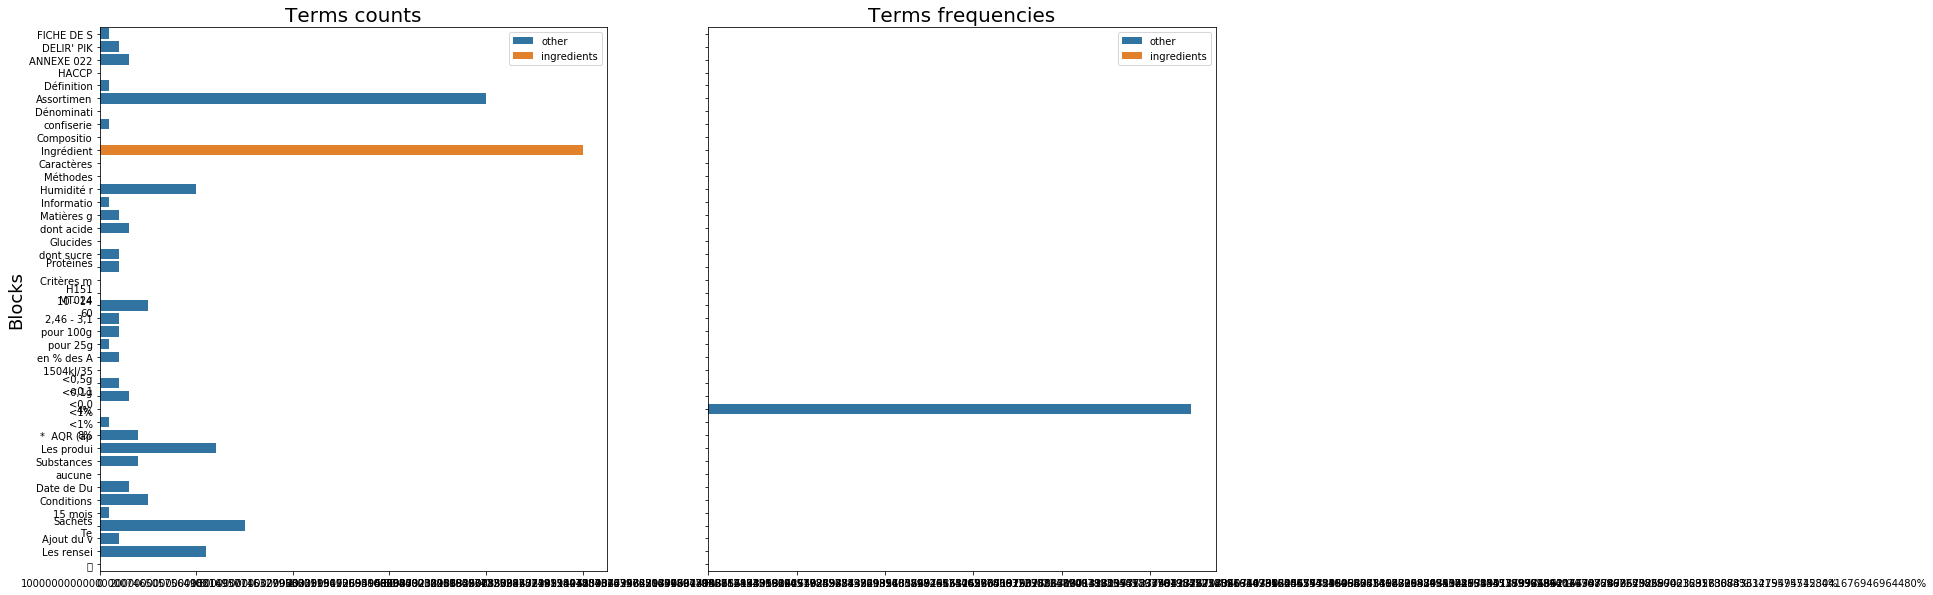

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

colors = ['other'] * len(test_doc_blocks)
colors[true_idx] = 'ingredients'

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)
sns.barplot(ax=ax[0], x=term_counts, y=[block[:10] for block in test_doc_blocks], hue=colors, dodge=False)
sns.barplot(ax=ax[1], x=term_freqs, y=[block[:10] for block in test_doc_blocks], hue=colors, dodge=False)
ax[0].set_title('Terms counts', fontsize=20)
ax[0].set_ylabel('Blocks', fontsize=18)
ax[1].set_title('Terms frequencies', fontsize=20)
ax[1].xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
pass

We can see that some very short texts also have an "ingredient word frequency" equal to 100%.

We can draw a scatter plot of these indicators:

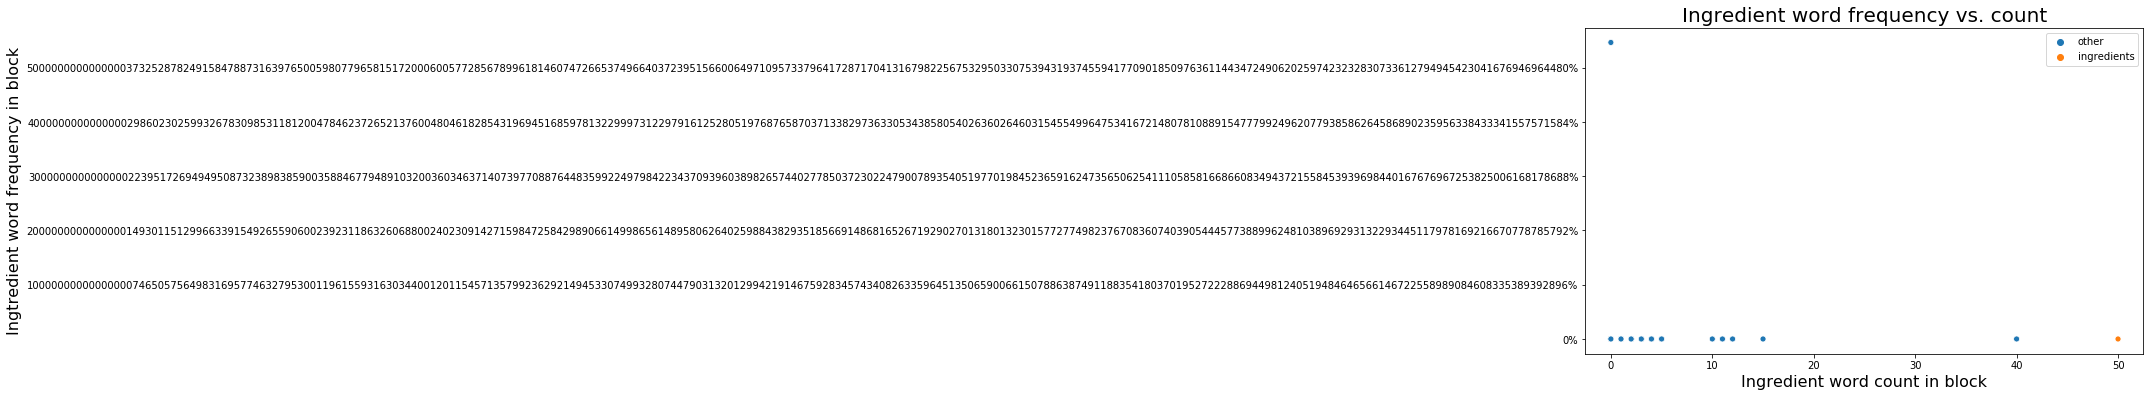

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.scatterplot(ax=ax, x=term_counts, y=term_freqs, hue=colors)
ax.set_title('Ingredient word frequency vs. count', fontsize=20)
ax.set_xlabel('Ingredient word count in block', fontsize=16)
ax.set_ylabel('Ingtredient word frequency in block', fontsize=16)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
pass

As expected, the correct ingredient list is in the top right quadrant of this representation. Should all cases yield results as sharply contrasted, we will have no difficulty in constructing an accurate functionality!

## 4.3 A difficulty arises in assessing ground truth for model validation

### Long strings are seldom strictly equal

We can compare the document ingredient list, with the one stored in the PIM system:

In [23]:
test_doc_blocks[true_idx].replace('\n', '') == df.loc[uid, "Ingrédients"]

False

Because a great deal of the current data in the PIM system has (at least once!) been manually keyed in, it is very likely that there will be an arguably high ratio of mistakes.

In [24]:
print('From pdf file: ')
print(test_doc_blocks[true_idx].replace('\n', ''))
print('--------------------------------------------------------------------------------------')
print('From PIM system:')
print(df.loc[uid, "Ingrédients"])

From pdf file: 
Ingrédients:  sirop de glucose; sucre; gélatine; dextrose; acidifiants: acide citrique, acide malique; agent d'enrobage: cire de carnauba; correcteurs d'acidité: citrate tricalcique, malate acide de sodium; arôme; concentrés de fruits et de plantes: citron, carthame, spiruline, patate douce, radis; sirop de sucre inverti; colorants: carmins, bleu patenté V, carotènes végétaux, lutéine, anthocyanes.
--------------------------------------------------------------------------------------
From PIM system:
Ingrédients: sirop de glucose, sucre, gélatine, dextrose, acidifiants: acide citrique, acide malique, agent d'enrobage: cire de carnauba, correcteurs d'acidité: citrate tricalcique, malate acide de sodium, arôme, concentrés de fruits et de plantes: citron, carthame, spiruline, patate douce, radis, sirop de sucre inverti, colorants: carmins, bleu patenté V, carotènes végétaux, lutéine, anthocyanes.


One can see that although very close, those 2 texts are somewhat different, from the punctuation marks.

### Different strategies can be undertaken to get around this difficulty

It is mandatory to compare the results of the model with the ground truth to assess the performance of the model. Some workarounds can be set up:

- Ignoring all products that do not have a strict matching block in their pdf file:
    - This will enable for a simple validation process
    - But it might dramatically decreasing the size of our dataset
    - as well as making 'short ingredient list' product overrepresented
    
    
- Defining a softer way to match texts between pdf files and PIM system data **with some text preprocessing** and filtering products that do not have a matching block
    - This will mitigate the previous drawbacks
    - But will increase complexity
    
    
- Defining a softer way to match texts between pdf files and PIM system data **by computing an edition distance** and filtering products that do not have a matching block
    - This will mitigate the previous drawbacks
    - But will increase complexity, as well as requiring to manually set up a distance threshold.
    - This could also lead to have separate pdf file blocks considered ground truth should the threshold distance be too high
    
- Considering blocks n-grams 
    - This might increase the number of 

- Manually labeling some pdf files
    - The most efficient
    - But the most time-consuming too!


# 5. Comparison between PIM system *ground truth* with documents content

We can try to find the products for which the PIM system ingredient list is strictly equal to one of the pdf file blocks.

In [37]:
%%time
uid_list = list(requester._directory.index)
path_list = [os.path.join('.', 'dumps', 'prd', uid, 'FTF.pdf') for uid in uid_list]
path_series = pd.Series(path_list, index=uid_list)
blocks_series = PDFDecoder.paths_to_blocks(path_series)

[Errno 2] No such file or directory: '.\\dumps\\prd\\aa6395f4-150a-4d70-b494-bac3bd4893f5\\FTF.pdf'
error at path: .\dumps\prd\aa6395f4-150a-4d70-b494-bac3bd4893f5\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\00f58597-7112-469a-ad9a-328c7a70ed27\\FTF.pdf'
error at path: .\dumps\prd\00f58597-7112-469a-ad9a-328c7a70ed27\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\ee65dc3f-843b-4026-8bf2-b6fd90c51d1b\\FTF.pdf'
error at path: .\dumps\prd\ee65dc3f-843b-4026-8bf2-b6fd90c51d1b\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\482c6620-b6fe-45bb-8fe2-49f79ff85abf\\FTF.pdf'
error at path: .\dumps\prd\482c6620-b6fe-45bb-8fe2-49f79ff85abf\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\71f3391b-5fc6-4a5b-b01e-740522aa216f\\FTF.pdf'
error at path: .\dumps\prd\71f3391b-5fc6-4a5b-b01e-740522aa216f\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\7f5530b3-8235-419f-8d2e-0a3427e02021\\FTF.pdf'
error at path: .\dumps\prd\7f5530b3-8235

[Errno 2] No such file or directory: '.\\dumps\\prd\\778b9912-c7bf-48b0-a433-f6db70e052f8\\FTF.pdf'
error at path: .\dumps\prd\778b9912-c7bf-48b0-a433-f6db70e052f8\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\246dda4c-940b-4f1c-9eac-6ebb2ec82b06\\FTF.pdf'
error at path: .\dumps\prd\246dda4c-940b-4f1c-9eac-6ebb2ec82b06\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\e15df8cf-af9e-4c52-936d-ead087b09492\\FTF.pdf'
error at path: .\dumps\prd\e15df8cf-af9e-4c52-936d-ead087b09492\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\575fa42c-fbb9-4875-9bc3-0208c559782f\\FTF.pdf'
error at path: .\dumps\prd\575fa42c-fbb9-4875-9bc3-0208c559782f\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\09f00fd1-0833-46a4-8cd9-c71eddedb80b\\FTF.pdf'
error at path: .\dumps\prd\09f00fd1-0833-46a4-8cd9-c71eddedb80b\FTF.pdf
Unexpected EOF
error at path: .\dumps\prd\6f8bfabe-0bb1-4862-bb03-5d215e70c72a\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\

[Errno 2] No such file or directory: '.\\dumps\\prd\\f5f2fa6e-70bf-4943-b1bb-06b3a3d458bc\\FTF.pdf'
error at path: .\dumps\prd\f5f2fa6e-70bf-4943-b1bb-06b3a3d458bc\FTF.pdf
Unexpected EOF
error at path: .\dumps\prd\a8a575c1-3c62-40f6-b574-59adbfb5a9bd\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\a39ea643-e794-4fc1-8f7e-952e1c6afa0f\\FTF.pdf'
error at path: .\dumps\prd\a39ea643-e794-4fc1-8f7e-952e1c6afa0f\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\9a79a2b7-9d4a-4cee-84bb-595a4b4c006a\\FTF.pdf'
error at path: .\dumps\prd\9a79a2b7-9d4a-4cee-84bb-595a4b4c006a\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\9b6c4c73-d3d4-4c81-9995-13fad9eecc35\\FTF.pdf'
error at path: .\dumps\prd\9b6c4c73-d3d4-4c81-9995-13fad9eecc35\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\64c04ca8-16f8-494e-9cd8-a9939c6d9e25\\FTF.pdf'
error at path: .\dumps\prd\64c04ca8-16f8-494e-9cd8-a9939c6d9e25\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\

[Errno 2] No such file or directory: '.\\dumps\\prd\\e96f5bb1-6617-44da-a574-d90d1207d682\\FTF.pdf'
error at path: .\dumps\prd\e96f5bb1-6617-44da-a574-d90d1207d682\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\b7039452-c153-4b22-9b93-ee66615b90ac\\FTF.pdf'
error at path: .\dumps\prd\b7039452-c153-4b22-9b93-ee66615b90ac\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\0234176b-98f8-4a14-88da-c5d498385821\\FTF.pdf'
error at path: .\dumps\prd\0234176b-98f8-4a14-88da-c5d498385821\FTF.pdf
Unexpected EOF
error at path: .\dumps\prd\1319ea0b-45af-49d1-9208-390cf089ef5d\FTF.pdf
Unexpected EOF
error at path: .\dumps\prd\19d77df9-126e-4f5b-af0d-49e1c200e2a3\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\80e44321-cb1a-4fc0-bae1-d8968f6d8b0c\\FTF.pdf'
error at path: .\dumps\prd\80e44321-cb1a-4fc0-bae1-d8968f6d8b0c\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\f8065b5f-3aa0-48d2-a71e-8fee700f0852\\FTF.pdf'
error at path: .\dumps\prd\f8065b5f-3a

[Errno 2] No such file or directory: '.\\dumps\\prd\\4f0325ed-aab0-4563-a0d8-52004646968d\\FTF.pdf'
error at path: .\dumps\prd\4f0325ed-aab0-4563-a0d8-52004646968d\FTF.pdf
Unexpected EOF
error at path: .\dumps\prd\a28f6d7e-3cd3-45bc-a840-0bdbd281d4a5\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\9f9018a5-4bb1-45e5-8aee-55b79fbe3b4d\\FTF.pdf'
error at path: .\dumps\prd\9f9018a5-4bb1-45e5-8aee-55b79fbe3b4d\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\4097688f-fd5d-4413-9500-5b9e621e223c\\FTF.pdf'
error at path: .\dumps\prd\4097688f-fd5d-4413-9500-5b9e621e223c\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\47242937-a197-40fc-8ac6-cb347a1b0ee1\\FTF.pdf'
error at path: .\dumps\prd\47242937-a197-40fc-8ac6-cb347a1b0ee1\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\594fb383-c8fc-4b35-9e48-e444ae5ece37\\FTF.pdf'
error at path: .\dumps\prd\594fb383-c8fc-4b35-9e48-e444ae5ece37\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\

[Errno 2] No such file or directory: '.\\dumps\\prd\\8aad60bb-5806-4ac6-babd-7184dbd621d5\\FTF.pdf'
error at path: .\dumps\prd\8aad60bb-5806-4ac6-babd-7184dbd621d5\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\7b365ff6-423b-42ff-ab67-67e0c7e4400f\\FTF.pdf'
error at path: .\dumps\prd\7b365ff6-423b-42ff-ab67-67e0c7e4400f\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\09591862-0ba8-4c83-a754-d9fafcf8cd1e\\FTF.pdf'
error at path: .\dumps\prd\09591862-0ba8-4c83-a754-d9fafcf8cd1e\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\e67eae3c-8bd6-44eb-b176-21596e13d721\\FTF.pdf'
error at path: .\dumps\prd\e67eae3c-8bd6-44eb-b176-21596e13d721\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\e2ac2b47-e4e8-461f-bd56-4e89abc01d22\\FTF.pdf'
error at path: .\dumps\prd\e2ac2b47-e4e8-461f-bd56-4e89abc01d22\FTF.pdf
Unexpected EOF
error at path: .\dumps\prd\1c601410-9423-4244-addd-375b54d9b99b\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\

Unexpected EOF
error at path: .\dumps\prd\226dce9e-a667-45f6-9b61-add87f155509\FTF.pdf
Unexpected EOF
error at path: .\dumps\prd\1c74bc93-4e90-4a4e-877e-07ee94d831e8\FTF.pdf
No /Root object! - Is this really a PDF?
error at path: .\dumps\prd\5258975f-09dc-4eb7-bce1-cd7bd107e1e3\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\e8b68047-0c34-49c7-ab6f-da5ec460f31f\\FTF.pdf'
error at path: .\dumps\prd\e8b68047-0c34-49c7-ab6f-da5ec460f31f\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\fe014d0d-8d6a-493b-85c1-970468c1a500\\FTF.pdf'
error at path: .\dumps\prd\fe014d0d-8d6a-493b-85c1-970468c1a500\FTF.pdf
Unexpected EOF
error at path: .\dumps\prd\326cab9a-4edb-44f7-87a8-243c5b334966\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\d92860c1-c252-4aee-82fe-a471de719af6\\FTF.pdf'
error at path: .\dumps\prd\d92860c1-c252-4aee-82fe-a471de719af6\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\916cd845-4f61-40d1-9fc1-8f531af92556\\FTF.pdf'
error at p

[Errno 2] No such file or directory: '.\\dumps\\prd\\8f7e4e8c-54d7-4982-91ca-06a1576d1279\\FTF.pdf'
error at path: .\dumps\prd\8f7e4e8c-54d7-4982-91ca-06a1576d1279\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\15f8df1e-38e0-4612-9adb-e2775505f229\\FTF.pdf'
error at path: .\dumps\prd\15f8df1e-38e0-4612-9adb-e2775505f229\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\10057adf-2550-4fea-9628-ecf0a0dbb527\\FTF.pdf'
error at path: .\dumps\prd\10057adf-2550-4fea-9628-ecf0a0dbb527\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\fba4a264-de6e-4492-8309-6978c9978038\\FTF.pdf'
error at path: .\dumps\prd\fba4a264-de6e-4492-8309-6978c9978038\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\83427f49-d359-414a-8315-03b9f1ca16d3\\FTF.pdf'
error at path: .\dumps\prd\83427f49-d359-414a-8315-03b9f1ca16d3\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\ba597ab6-9222-44af-9927-779bd0832332\\FTF.pdf'
error at path: .\dumps\prd\ba597ab6-9222

[Errno 2] No such file or directory: '.\\dumps\\prd\\aaae58a5-1371-43e0-8187-cf6d742e7fde\\FTF.pdf'
error at path: .\dumps\prd\aaae58a5-1371-43e0-8187-cf6d742e7fde\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\95c5d8a7-58c8-4126-ad88-fac5fc8f11c4\\FTF.pdf'
error at path: .\dumps\prd\95c5d8a7-58c8-4126-ad88-fac5fc8f11c4\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\1ed158aa-ddec-455e-9537-7c8299a0f105\\FTF.pdf'
error at path: .\dumps\prd\1ed158aa-ddec-455e-9537-7c8299a0f105\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\41ed79ef-48a4-4c94-940b-3c4a7442ccef\\FTF.pdf'
error at path: .\dumps\prd\41ed79ef-48a4-4c94-940b-3c4a7442ccef\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\10df5804-8758-4c6c-a01a-12e276a6303b\\FTF.pdf'
error at path: .\dumps\prd\10df5804-8758-4c6c-a01a-12e276a6303b\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\5a18eebc-eedf-43b3-a190-391d94633679\\FTF.pdf'
error at path: .\dumps\prd\5a18eebc-eedf

[Errno 2] No such file or directory: '.\\dumps\\prd\\a0f3633d-e3e5-4fe4-86dd-daf59a7b4c86\\FTF.pdf'
error at path: .\dumps\prd\a0f3633d-e3e5-4fe4-86dd-daf59a7b4c86\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\5e7cd90b-e5ce-43aa-a9ad-b20cd1030aa4\\FTF.pdf'
error at path: .\dumps\prd\5e7cd90b-e5ce-43aa-a9ad-b20cd1030aa4\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\44af5622-c426-4bf4-8fdc-6286370d7687\\FTF.pdf'
error at path: .\dumps\prd\44af5622-c426-4bf4-8fdc-6286370d7687\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\b29becff-38d1-494e-af81-f0074c1e0d28\\FTF.pdf'
error at path: .\dumps\prd\b29becff-38d1-494e-af81-f0074c1e0d28\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\3e164d70-17f3-4839-b765-bd6acf186c4c\\FTF.pdf'
error at path: .\dumps\prd\3e164d70-17f3-4839-b765-bd6acf186c4c\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\ec2b2567-415d-47d7-8308-4cf1fb8ddfb0\\FTF.pdf'
error at path: .\dumps\prd\ec2b2567-415d

[Errno 2] No such file or directory: '.\\dumps\\prd\\ed481c35-3bab-4621-86a2-596925368691\\FTF.pdf'
error at path: .\dumps\prd\ed481c35-3bab-4621-86a2-596925368691\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\fa1a8fab-0036-448f-987a-49b65940ec25\\FTF.pdf'
error at path: .\dumps\prd\fa1a8fab-0036-448f-987a-49b65940ec25\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\785da5b3-d5cb-4a62-a5ae-d26144a70fc2\\FTF.pdf'
error at path: .\dumps\prd\785da5b3-d5cb-4a62-a5ae-d26144a70fc2\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\29c24246-0178-47c0-9e2f-b794b541ac42\\FTF.pdf'
error at path: .\dumps\prd\29c24246-0178-47c0-9e2f-b794b541ac42\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\de89abd1-b353-4801-896b-a879cc2be814\\FTF.pdf'
error at path: .\dumps\prd\de89abd1-b353-4801-896b-a879cc2be814\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\cb63fcb9-bb56-4bac-82d9-d7ecced3a17e\\FTF.pdf'
error at path: .\dumps\prd\cb63fcb9-bb56

[Errno 2] No such file or directory: '.\\dumps\\prd\\2a11c325-7048-4e3d-93e3-ef56112c33a8\\FTF.pdf'
error at path: .\dumps\prd\2a11c325-7048-4e3d-93e3-ef56112c33a8\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\b33d59dd-e782-4928-bfad-6d66be3ee00e\\FTF.pdf'
error at path: .\dumps\prd\b33d59dd-e782-4928-bfad-6d66be3ee00e\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\8ee43db0-5760-4c97-a5eb-83d91d45250f\\FTF.pdf'
error at path: .\dumps\prd\8ee43db0-5760-4c97-a5eb-83d91d45250f\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\62bcfb59-4378-429e-b222-ffb8e7df6523\\FTF.pdf'
error at path: .\dumps\prd\62bcfb59-4378-429e-b222-ffb8e7df6523\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\8c859e8a-a44a-4073-b4fa-75a18d3cc704\\FTF.pdf'
error at path: .\dumps\prd\8c859e8a-a44a-4073-b4fa-75a18d3cc704\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\e042b8e6-fb85-4761-9d0d-45f0af3f77f7\\FTF.pdf'
error at path: .\dumps\prd\e042b8e6-fb85

[Errno 2] No such file or directory: '.\\dumps\\prd\\abe78d21-5118-4b02-b877-2b6c763ee075\\FTF.pdf'
error at path: .\dumps\prd\abe78d21-5118-4b02-b877-2b6c763ee075\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\22c14459-b65d-4454-99c4-ec49d97ab14d\\FTF.pdf'
error at path: .\dumps\prd\22c14459-b65d-4454-99c4-ec49d97ab14d\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\b83dbafa-3e98-484b-b621-914c59c18ee5\\FTF.pdf'
error at path: .\dumps\prd\b83dbafa-3e98-484b-b621-914c59c18ee5\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\42866660-7098-4e48-8a89-4926b9d7d4b8\\FTF.pdf'
error at path: .\dumps\prd\42866660-7098-4e48-8a89-4926b9d7d4b8\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\57add800-97c6-4c51-b01a-47dfcb279339\\FTF.pdf'
error at path: .\dumps\prd\57add800-97c6-4c51-b01a-47dfcb279339\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\44972206-a1ef-4ba8-b81e-f66d5886dad3\\FTF.pdf'
error at path: .\dumps\prd\44972206-a1ef

[Errno 2] No such file or directory: '.\\dumps\\prd\\2558e010-3d56-4328-b6e0-8df2a94db098\\FTF.pdf'
error at path: .\dumps\prd\2558e010-3d56-4328-b6e0-8df2a94db098\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\a40d51e5-0d83-40cc-b03e-f453346a53ff\\FTF.pdf'
error at path: .\dumps\prd\a40d51e5-0d83-40cc-b03e-f453346a53ff\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\610afb61-095a-42ea-854b-05d4d7eb849e\\FTF.pdf'
error at path: .\dumps\prd\610afb61-095a-42ea-854b-05d4d7eb849e\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\88507d81-ae18-450b-bdd7-24ae73eb3b67\\FTF.pdf'
error at path: .\dumps\prd\88507d81-ae18-450b-bdd7-24ae73eb3b67\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\bcffb35e-8c05-48ff-a94b-8ad949cf62aa\\FTF.pdf'
error at path: .\dumps\prd\bcffb35e-8c05-48ff-a94b-8ad949cf62aa\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\f6a9a61c-08ad-470b-9ccd-dc745152d072\\FTF.pdf'
error at path: .\dumps\prd\f6a9a61c-08ad

[Errno 2] No such file or directory: '.\\dumps\\prd\\d8095d42-363f-4c55-aae9-a0ecd1e37e35\\FTF.pdf'
error at path: .\dumps\prd\d8095d42-363f-4c55-aae9-a0ecd1e37e35\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\11dd291a-6ed2-40c0-8041-79ec47469726\\FTF.pdf'
error at path: .\dumps\prd\11dd291a-6ed2-40c0-8041-79ec47469726\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\9b4d820e-9694-423f-b039-a52328c006bf\\FTF.pdf'
error at path: .\dumps\prd\9b4d820e-9694-423f-b039-a52328c006bf\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\0d688623-66a0-4a27-a81d-460d7c62c55c\\FTF.pdf'
error at path: .\dumps\prd\0d688623-66a0-4a27-a81d-460d7c62c55c\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\6adc2691-f85f-48fb-ae2a-cde8099fb49b\\FTF.pdf'
error at path: .\dumps\prd\6adc2691-f85f-48fb-ae2a-cde8099fb49b\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\4c4a334c-3cdd-4346-ab40-169a6674b3e0\\FTF.pdf'
error at path: .\dumps\prd\4c4a334c-3cdd

[Errno 2] No such file or directory: '.\\dumps\\prd\\3ec9cc99-7ba2-449d-afc7-b22e465a192a\\FTF.pdf'
error at path: .\dumps\prd\3ec9cc99-7ba2-449d-afc7-b22e465a192a\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\4f5de3b5-68a9-42c6-9bf8-3e22cda01d9d\\FTF.pdf'
error at path: .\dumps\prd\4f5de3b5-68a9-42c6-9bf8-3e22cda01d9d\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\8cf40a8c-5f8e-4515-865f-01f58eb230df\\FTF.pdf'
error at path: .\dumps\prd\8cf40a8c-5f8e-4515-865f-01f58eb230df\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\822e6085-034d-408f-95f8-09b921edd67d\\FTF.pdf'
error at path: .\dumps\prd\822e6085-034d-408f-95f8-09b921edd67d\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\9d993708-6494-4028-9fa6-9a0382b639f1\\FTF.pdf'
error at path: .\dumps\prd\9d993708-6494-4028-9fa6-9a0382b639f1\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\5b772f1c-163d-4069-9ce8-776f297025c2\\FTF.pdf'
error at path: .\dumps\prd\5b772f1c-163d

[Errno 2] No such file or directory: '.\\dumps\\prd\\cc39f22d-bfc6-4d60-850a-e7a4f4cd1896\\FTF.pdf'
error at path: .\dumps\prd\cc39f22d-bfc6-4d60-850a-e7a4f4cd1896\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\bc80d230-8e5b-4717-80a7-e2641f5979e2\\FTF.pdf'
error at path: .\dumps\prd\bc80d230-8e5b-4717-80a7-e2641f5979e2\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\c75a83f6-c280-4708-a568-274ff1515c7c\\FTF.pdf'
error at path: .\dumps\prd\c75a83f6-c280-4708-a568-274ff1515c7c\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\c4fad935-4682-4da6-a047-c947525d2a66\\FTF.pdf'
error at path: .\dumps\prd\c4fad935-4682-4da6-a047-c947525d2a66\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\527bac39-65b4-4c6a-b20c-83ca56ee02c1\\FTF.pdf'
error at path: .\dumps\prd\527bac39-65b4-4c6a-b20c-83ca56ee02c1\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\fa380ee9-008e-4b6b-9bcc-c2fb5f1613a7\\FTF.pdf'
error at path: .\dumps\prd\fa380ee9-008e

[Errno 2] No such file or directory: '.\\dumps\\prd\\640634dc-86e2-4ba6-bddc-efc0e57cd93a\\FTF.pdf'
error at path: .\dumps\prd\640634dc-86e2-4ba6-bddc-efc0e57cd93a\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\8611767d-023c-41ac-8cd7-2b1c6a5615b1\\FTF.pdf'
error at path: .\dumps\prd\8611767d-023c-41ac-8cd7-2b1c6a5615b1\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\74d8b8ed-733e-4f4d-822f-9a5e11227514\\FTF.pdf'
error at path: .\dumps\prd\74d8b8ed-733e-4f4d-822f-9a5e11227514\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\5317c719-8d70-4aeb-8672-8d38c51a2a2c\\FTF.pdf'
error at path: .\dumps\prd\5317c719-8d70-4aeb-8672-8d38c51a2a2c\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\b7b2a6b9-0534-4bed-a4a5-a08285ad31a0\\FTF.pdf'
error at path: .\dumps\prd\b7b2a6b9-0534-4bed-a4a5-a08285ad31a0\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\0a0522a2-9eb6-4622-8b27-416fb09d08ad\\FTF.pdf'
error at path: .\dumps\prd\0a0522a2-9eb6

[Errno 2] No such file or directory: '.\\dumps\\prd\\4cb8fa90-d588-4901-bfff-124612f2a59f\\FTF.pdf'
error at path: .\dumps\prd\4cb8fa90-d588-4901-bfff-124612f2a59f\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\fa409232-a662-4b2d-ad03-758c88c9bfda\\FTF.pdf'
error at path: .\dumps\prd\fa409232-a662-4b2d-ad03-758c88c9bfda\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\f4125946-1dcd-44d2-83ee-b59901ef034e\\FTF.pdf'
error at path: .\dumps\prd\f4125946-1dcd-44d2-83ee-b59901ef034e\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\87adad9e-8fc5-41cc-bf46-51741cfb6422\\FTF.pdf'
error at path: .\dumps\prd\87adad9e-8fc5-41cc-bf46-51741cfb6422\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\547eafb9-aa1f-49e2-870d-120e3ec75b59\\FTF.pdf'
error at path: .\dumps\prd\547eafb9-aa1f-49e2-870d-120e3ec75b59\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\d178c1c1-bb5a-4983-9d35-95480c713aea\\FTF.pdf'
error at path: .\dumps\prd\d178c1c1-bb5a

[Errno 2] No such file or directory: '.\\dumps\\prd\\cb59e249-a827-403f-97ac-22f90a80c7fc\\FTF.pdf'
error at path: .\dumps\prd\cb59e249-a827-403f-97ac-22f90a80c7fc\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\a1aceea1-7399-4577-a335-da3d29e3650c\\FTF.pdf'
error at path: .\dumps\prd\a1aceea1-7399-4577-a335-da3d29e3650c\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\1daa5b93-b4a5-4d14-a42d-de1567cb6eb5\\FTF.pdf'
error at path: .\dumps\prd\1daa5b93-b4a5-4d14-a42d-de1567cb6eb5\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\6cfe13ee-f24f-43f1-b78b-ae70c3f58092\\FTF.pdf'
error at path: .\dumps\prd\6cfe13ee-f24f-43f1-b78b-ae70c3f58092\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\f3380406-92b4-44b0-92ce-7466886f2837\\FTF.pdf'
error at path: .\dumps\prd\f3380406-92b4-44b0-92ce-7466886f2837\FTF.pdf
[Errno 2] No such file or directory: '.\\dumps\\prd\\7f4d3bac-13c5-4c99-9295-4ffff9a8ec82\\FTF.pdf'
error at path: .\dumps\prd\7f4d3bac-13c5

In [46]:
blocks_series.to_csv(os.path.join('.', 'dumps', 'prd', 'blocks_20200206.csv'), header=True)

In [49]:
blocks2 = pd.read_csv(os.path.join('.', 'dumps', 'prd', 'blocks_20200206.csv'), header=0, squeeze=True, index_col=0, nrows=1000)

In [50]:
blocks2

58f67e91-6d16-4f12-97c7-e67d24be6805              DESCRIPTION DU PRODUIT
58f67e91-6d16-4f12-97c7-e67d24be6805                     FICHE TECHNIQUE
58f67e91-6d16-4f12-97c7-e67d24be6805                    CURCUMA MOULU PK
58f67e91-6d16-4f12-97c7-e67d24be6805      Liste des ingrédients\nCurcuma
58f67e91-6d16-4f12-97c7-e67d24be6805    114101\nIndice :\nDate :\nPage :
                                                      ...               
2c0b1547-ea48-47b9-9779-1d32a420f649                        75008 Paris 
2c0b1547-ea48-47b9-9779-1d32a420f649             FICHE TECHNIQUE CLIENT 
2c0b1547-ea48-47b9-9779-1d32a420f649         Référence :   CUS/19-CV402 
2c0b1547-ea48-47b9-9779-1d32a420f649                                    
2c0b1547-ea48-47b9-9779-1d32a420f649                                 \n 
Name: 0, Length: 1000, dtype: object

## Different strategies

TODO !!!

But The similarity between the ground truth (the pdf file) and the content of the PIM system can be measured via the [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance). This distance is the number of character insertions, deletions or substitutions to get from one text to the other.

If we compute this distance between the pdf file block and the PIM system content we get:

In [27]:
import jellyfish
dist = jellyfish.levenshtein_distance(test_doc_blocks[true_idx].replace('\n', ''),
                                      df.loc[uid, "Ingrédients"])
print(f'Levenshtein distance between pdf file and PIM system content is: {dist}')

Levenshtein distance between pdf file and PIM system content is: 11


We can compute this distance for each block in our pdf file, and plot it in a bar graph:

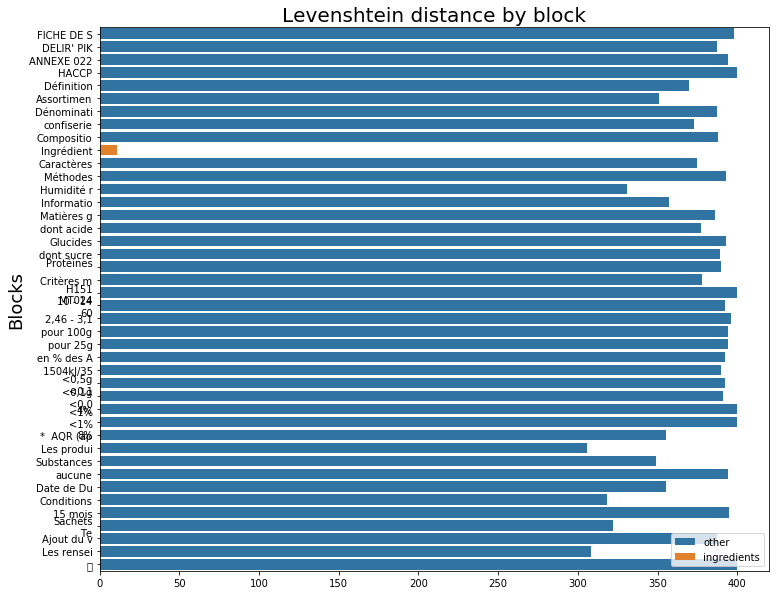

In [28]:
distances = list(map(lambda x:jellyfish.levenshtein_distance(x.replace('\n', ''), df.loc[uid, "Ingrédients"]),
                 test_doc_blocks))
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(ax=ax, x=distances, y=[block[:10] for block in test_doc_blocks], hue=colors, dodge=False)
ax.set_title('Levenshtein distance by block', fontsize=20)
ax.set_ylabel('Blocks', fontsize=18)
pass

## 4.2 Making prediction on a document